<a href="https://colab.research.google.com/github/Sylwiaes/machine-learning-bootcamp/blob/main/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)


 







### <a name='a1'></a> Import Bibliotek

In [ ]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.19.5
Pandas: 1.1.5


### <a name='a2'></a> Załadowanie danych

In [ ]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2021-05-21 to 2016-05-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


### <a name='a3'></a> Eksploracja danych

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2021-05-21,3250.0000,3256.6946,3197.010,3203.08,4104882
2021-05-20,3244.4042,3259.6799,3236.180,3247.68,2633192
2021-05-19,3195.0000,3234.7500,3184.000,3231.80,2679708
2021-05-18,3292.5750,3312.0000,3230.370,3232.28,2828391
2021-05-17,3245.9300,3292.7500,3234.590,3270.39,3723925
...,...,...,...,...,...
2016-05-31,712.3300,724.2300,711.320,722.79,3351363
2016-05-27,715.0000,716.6000,711.100,712.24,1747954
2016-05-26,708.3300,715.0000,707.293,714.91,2139041


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-05-21,3250.0000,3256.6946,3197.01,3203.08,4104882
2021-05-20,3244.4042,3259.6799,3236.18,3247.68,2633192
2021-05-19,3195.0000,3234.7500,3184.00,3231.80,2679708
2021-05-18,3292.5750,3312.0000,3230.37,3232.28,2828391
2021-05-17,3245.9300,3292.7500,3234.59,3270.39,3723925


In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2021-05-21,3250.0000,3256.6946,3197.01,3203.08,4104882
2021-05-20,3244.4042,3259.6799,3236.18,3247.68,2633192
2021-05-19,3195.0000,3234.7500,3184.00,3231.80,2679708


In [ ]:
df.tail() #5 ostatnich wierszy obiektu

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-31,712.33,724.23,711.320,722.79,3351363
2016-05-27,715.00,716.60,711.100,712.24,1747954
2016-05-26,708.33,715.00,707.293,714.91,2139041
2016-05-25,708.00,710.86,705.516,708.35,2925016
2016-05-24,698.01,707.50,698.000,704.20,2218543


In [ ]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2016-06-07,729.89,730.00,720.550,723.74,2113300
2016-06-06,726.50,731.50,724.420,726.73,2027673
2016-06-03,726.74,727.00,718.430,725.54,3153622
2016-06-02,720.97,728.25,715.500,728.24,2434324
2016-06-01,720.90,726.43,718.220,719.44,2461798
2016-05-31,712.33,724.23,711.320,722.79,3351363
2016-05-27,715.00,716.60,711.100,712.24,1747954
2016-05-26,708.33,715.00,707.293,714.91,2139041
2016-05-25,708.00,710.86,705.516,708.35,2925016


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df.columns = [col.lower() for col in df.columns] #zamieniamy duże litery na małe
df.head()

,open,high,low,close,volume
Date,,,,,
2021-05-21,3250.0000,3256.6946,3197.01,3203.08,4104882
2021-05-20,3244.4042,3259.6799,3236.18,3247.68,2633192
2021-05-19,3195.0000,3234.7500,3184.00,3231.80,2679708
2021-05-18,3292.5750,3312.0000,3230.37,3232.28,2828391
2021-05-17,3245.9300,3292.7500,3234.59,3270.39,3723925


In [ ]:
df.describe()

,open,high,low,close,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1761.088770,1779.307035,1740.241964,1760.243653,4.251230e+06
std,812.794495,823.555353,800.167001,811.294738,2.107303e+06
min,692.010000,696.819000,682.115000,691.360000,8.813370e+05
25%,991.702500,996.697500,982.000000,988.212500,2.851330e+06
50%,1722.235000,1740.070000,1697.560000,1721.125000,3.675627e+06
75%,1999.347500,2013.042500,1973.027500,1994.737500,5.101689e+06
max,3547.000000,3554.000000,3486.685000,3531.450000,1.655260e+07


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1258.0,1.761089e+03,8.127945e+02,692.010,9.917025e+02,1722.235,1.999348e+03,3.547000e+03
high,1258.0,1.779307e+03,8.235554e+02,696.819,9.966975e+02,1740.070,2.013043e+03,3.554000e+03
low,1258.0,1.740242e+03,8.001670e+02,682.115,9.820000e+02,1697.560,1.973028e+03,3.486685e+03
close,1258.0,1.760244e+03,8.112947e+02,691.360,9.882125e+02,1721.125,1.994737e+03,3.531450e+03
volume,1258.0,4.251230e+06,2.107303e+06,881337.000,2.851330e+06,3675627.000,5.101689e+06,1.655260e+07


### <a name='a4'></a> Selekcja kolumn

In [ ]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2021-05-21,3250.0000,3256.6946,3197.01,3203.08,4104882
2021-05-20,3244.4042,3259.6799,3236.18,3247.68,2633192
2021-05-19,3195.0000,3234.7500,3184.00,3231.80,2679708
2021-05-18,3292.5750,3312.0000,3230.37,3232.28,2828391
2021-05-17,3245.9300,3292.7500,3234.59,3270.39,3723925
2021-05-14,3185.5600,3228.8600,3183.00,3222.90,3325022
2021-05-13,3185.4700,3203.8400,3133.00,3161.47,3356877
2021-05-12,3185.0000,3207.9400,3133.10,3151.94,4936410
2021-05-11,3136.2800,3238.0000,3127.37,3223.91,4619781


In [ ]:
df['open']

Date
2021-05-21    3250.0000
2021-05-20    3244.4042
2021-05-19    3195.0000
2021-05-18    3292.5750
2021-05-17    3245.9300
2021-05-14    3185.5600
2021-05-13    3185.4700
2021-05-12    3185.0000
2021-05-11    3136.2800
2021-05-10    3282.3200
Name: open, dtype: float64

In [ ]:
df.open

Date
2021-05-21    3250.0000
2021-05-20    3244.4042
2021-05-19    3195.0000
2021-05-18    3292.5750
2021-05-17    3245.9300
2021-05-14    3185.5600
2021-05-13    3185.4700
2021-05-12    3185.0000
2021-05-11    3136.2800
2021-05-10    3282.3200
Name: open, dtype: float64

In [ ]:
df[['open', 'close']]

,open,close
Date,,
2021-05-21,3250.0000,3203.08
2021-05-20,3244.4042,3247.68
2021-05-19,3195.0000,3231.80
2021-05-18,3292.5750,3232.28
2021-05-17,3245.9300,3270.39
2021-05-14,3185.5600,3222.90
2021-05-13,3185.4700,3161.47
2021-05-12,3185.0000,3151.94
2021-05-11,3136.2800,3223.91


In [ ]:
df.iloc[:, 0]

Date
2021-05-21    3250.0000
2021-05-20    3244.4042
2021-05-19    3195.0000
2021-05-18    3292.5750
2021-05-17    3245.9300
2021-05-14    3185.5600
2021-05-13    3185.4700
2021-05-12    3185.0000
2021-05-11    3136.2800
2021-05-10    3282.3200
Name: open, dtype: float64

In [ ]:
df.iloc[:, [0, 3]] #wszystkie wiersze, kolumna 1 i 4

,open,close
Date,,
2021-05-21,3250.0000,3203.08
2021-05-20,3244.4042,3247.68
2021-05-19,3195.0000,3231.80
2021-05-18,3292.5750,3232.28
2021-05-17,3245.9300,3270.39
2021-05-14,3185.5600,3222.90
2021-05-13,3185.4700,3161.47
2021-05-12,3185.0000,3151.94
2021-05-11,3136.2800,3223.91


In [ ]:
df.iloc[:, 3:5]

,close,volume
Date,,
2021-05-21,3203.08,4104882
2021-05-20,3247.68,2633192
2021-05-19,3231.80,2679708
2021-05-18,3232.28,2828391
2021-05-17,3270.39,3723925
2021-05-14,3222.90,3325022
2021-05-13,3161.47,3356877
2021-05-12,3151.94,4936410
2021-05-11,3223.91,4619781


In [ ]:
df.iloc[:, -1]

Date
2021-05-21    4104882
2021-05-20    2633192
2021-05-19    2679708
2021-05-18    2828391
2021-05-17    3723925
2021-05-14    3325022
2021-05-13    3356877
2021-05-12    4936410
2021-05-11    4619781
2021-05-10    5838603
Name: volume, dtype: int64

In [ ]:
df.iloc[:, [-1]]

,volume
Date,
2021-05-21,4104882
2021-05-20,2633192
2021-05-19,2679708
2021-05-18,2828391
2021-05-17,3723925
2021-05-14,3325022
2021-05-13,3356877
2021-05-12,4936410
2021-05-11,4619781


In [ ]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2021-05-21,3197.01,3203.08,4104882
2021-05-20,3236.18,3247.68,2633192
2021-05-19,3184.00,3231.80,2679708
2021-05-18,3230.37,3232.28,2828391
2021-05-17,3234.59,3270.39,3723925
2021-05-14,3183.00,3222.90,3325022
2021-05-13,3133.00,3161.47,3356877
2021-05-12,3133.10,3151.94,4936410
2021-05-11,3127.37,3223.91,4619781


### <a name='a5'></a>  Selekcja wierszy

In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2021-05-21,3250.0000,3256.6946,3197.01,3203.08,4104882
2021-05-20,3244.4042,3259.6799,3236.18,3247.68,2633192
2021-05-19,3195.0000,3234.7500,3184.00,3231.80,2679708
2021-05-18,3292.5750,3312.0000,3230.37,3232.28,2828391
2021-05-17,3245.9300,3292.7500,3234.59,3270.39,3723925
2021-05-14,3185.5600,3228.8600,3183.00,3222.90,3325022
2021-05-13,3185.4700,3203.8400,3133.00,3161.47,3356877
2021-05-12,3185.0000,3207.9400,3133.10,3151.94,4936410
2021-05-11,3136.2800,3238.0000,3127.37,3223.91,4619781


In [ ]:
df.iloc[0]

open      3.250000e+03
high      3.256695e+03
low       3.197010e+03
close     3.203080e+03
volume    4.104882e+06
Name: 2021-05-21 00:00:00, dtype: float64

In [ ]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2021-05-21,3250.0000,3256.6946,3197.01,3203.08,4104882
2021-05-20,3244.4042,3259.6799,3236.18,3247.68,2633192
2021-05-19,3195.0000,3234.7500,3184.00,3231.80,2679708


In [ ]:
df.loc['2021-05-21'] 

,open,high,low,close,volume
Date,,,,,
2021-05-21,3250.0,3256.6946,3197.01,3203.08,4104882


In [ ]:
df.loc['2021-05-21': '2021-05-17']

,open,high,low,close,volume
Date,,,,,
2021-05-21,3250.0000,3256.6946,3197.01,3203.08,4104882
2021-05-20,3244.4042,3259.6799,3236.18,3247.68,2633192
2021-05-19,3195.0000,3234.7500,3184.00,3231.80,2679708
2021-05-18,3292.5750,3312.0000,3230.37,3232.28,2828391
2021-05-17,3245.9300,3292.7500,3234.59,3270.39,3723925


### <a name='a6'></a> Obliczanie nowych kolumn

In [ ]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 513 entries, 2021-05-21 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    513 non-null    float64
 1   High    513 non-null    float64
 2   Low     513 non-null    float64
 3   Close   513 non-null    float64
 4   Volume  513 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 24.0 KB


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-05-21,49.57,49.95,48.760,48.82,20013223
2021-05-20,49.57,49.95,48.760,49.33,18822300
2021-05-19,47.53,49.83,47.370,49.47,16517476
2021-05-18,49.67,50.29,48.525,49.17,28244446
2021-05-17,47.24,47.94,46.510,47.51,17475275


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,513.000000,513.000000,513.000000,513.000000,5.130000e+02
mean,39.263866,40.049044,38.356639,39.216082,2.370733e+07
std,10.193592,10.296381,10.019528,10.129451,1.791490e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,31.450000,32.360000,30.760000,31.500000,1.309307e+07
50%,35.690000,36.500000,35.020000,35.770000,1.921368e+07
75%,46.740000,47.710000,45.600000,46.400000,2.930171e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2021-05-21,49.57,49.95,48.76,48.82,20013223
2021-05-20,49.57,49.95,48.76,49.33,18822300
2021-05-19,47.53,49.83,47.37,49.47,16517476


In [ ]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2021-05-21,49.57,49.95,48.760,48.82,20013223,49.195
2021-05-20,49.57,49.95,48.760,49.33,18822300,49.450
2021-05-19,47.53,49.83,47.370,49.47,16517476,48.500
2021-05-18,49.67,50.29,48.525,49.17,28244446,49.420
2021-05-17,47.24,47.94,46.510,47.51,17475275,47.375


In [ ]:
df = df.sort_index() #sortowanie indeksu od najstarszej do najnowszej danej
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [ ]:
df['Close_shift'] = df.Close.shift(1) #dodanie nowej kolumny
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [ ]:
df[["Close"]].shift(1) #przesunięcie danych o 1 wiersz w dół

,Close
Date,
2019-05-10,NaN
2019-05-13,41.57
2019-05-14,37.10
2019-05-15,39.96
2019-05-16,41.29
...,...
2021-05-17,47.42
2021-05-18,47.51
2021-05-19,49.17


In [ ]:
df['Daily_Change'] = df.Close / df.Close_shift - 1 #obliczenie stopy procentowej
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [ ]:
del df['Daily Change'] #usuwanie niepotrzebnej kolumny

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [ ]:
df.Daily_Change.min() #minimalna wartość z kolumny Daily_Change

-0.21628767847699626

In [ ]:
df.Daily_Change.max()

0.3825910931174088

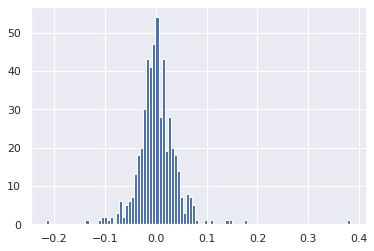

In [ ]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

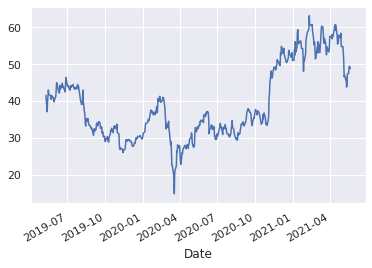

In [ ]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [ ]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2021-05-17,47.24,47.94,46.510,47.51,17475275,47.375,47.42,0.001898
2021-05-18,49.67,50.29,48.525,49.17,28244446,49.420,47.51,0.034940
2021-05-19,47.53,49.83,47.370,49.47,16517476,48.500,49.17,0.006101


In [ ]:
df_negative = df[df.Daily_Change < 0]
df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.240,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.290,41.27,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.680,39.46,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.240,41.25,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.280,40.50,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2021-05-06,48.39,49.810,45.72,46.65,79242393,47.520,51.18,-0.088511
2021-05-10,47.71,47.850,45.60,45.79,28309814,46.750,47.03,-0.026366
2021-05-12,45.90,46.105,43.17,43.81,32117357,44.855,46.21,-0.051937


In [ ]:
df_positive = df[df.Daily_Change > 0] #wycinamy dane, gdzie dzienna zmiana była większa od 0
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.2500,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.5000,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.4100,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2021-05-13,44.99,46.10,43.5601,44.48,36205110,44.735,43.81,0.015293
2021-05-14,45.03,47.71,44.8500,47.42,25323284,46.225,44.48,0.066097
2021-05-17,47.24,47.94,46.5100,47.51,17475275,47.375,47.42,0.001898


In [ ]:
df_negative.Daily_Change.mean()

-0.02477957223494408

In [ ]:
df_positive.Daily_Change.mean() #średnia dodatnia stopa zwrotu

0.027883310211800173

In [ ]:
df.Close == df.High #sprawdzamy, czy cena Close będzie równa najwyższej cenie w ciągu dnia

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2021-05-17    False
2021-05-18    False
2021-05-19    False
2021-05-20    False
2021-05-21    False
Length: 513, dtype: bool

In [ ]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780


In [ ]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452


In [ ]:
df.index > '2021-05-01'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
df[df.index > '2021-05-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2021-05-03,55.12,56.130,54.8400,54.85,13903303,54.985,54.77,0.001461
2021-05-04,54.52,54.720,52.0100,52.99,19336646,53.755,54.85,-0.033911
2021-05-05,53.87,53.870,50.6300,51.18,28232537,52.525,52.99,-0.034157
2021-05-06,48.39,49.810,45.7200,46.65,79242393,47.520,51.18,-0.088511
2021-05-07,47.22,48.600,46.5346,47.03,27933929,47.125,46.65,0.008146
2021-05-10,47.71,47.850,45.6000,45.79,28309814,46.750,47.03,-0.026366
2021-05-11,44.50,46.790,44.1820,46.21,29106917,45.355,45.79,0.009172
2021-05-12,45.90,46.105,43.1700,43.81,32117357,44.855,46.21,-0.051937
2021-05-13,44.99,46.100,43.5601,44.48,36205110,44.735,43.81,0.015293


In [ ]:
df[(df.index >= '2021-05-01') & (df.index < '2021-05-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2021-05-03,55.12,56.130,54.8400,54.85,13903303,54.985,54.77,0.001461
2021-05-04,54.52,54.720,52.0100,52.99,19336646,53.755,54.85,-0.033911
2021-05-05,53.87,53.870,50.6300,51.18,28232537,52.525,52.99,-0.034157
2021-05-06,48.39,49.810,45.7200,46.65,79242393,47.520,51.18,-0.088511
2021-05-07,47.22,48.600,46.5346,47.03,27933929,47.125,46.65,0.008146
2021-05-10,47.71,47.850,45.6000,45.79,28309814,46.750,47.03,-0.026366
2021-05-11,44.50,46.790,44.1820,46.21,29106917,45.355,45.79,0.009172
2021-05-12,45.90,46.105,43.1700,43.81,32117357,44.855,46.21,-0.051937
2021-05-13,44.99,46.100,43.5601,44.48,36205110,44.735,43.81,0.015293


In [ ]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-07')] #alternatywa

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.41,31.50,-0.004127
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.09,26.94,0.016333


In [ ]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2021-05-17,47.24,47.94,46.510,47.51,17475275,47.375,47.42,0.001898
2021-05-18,49.67,50.29,48.525,49.17,28244446,49.420,47.51,0.034940
2021-05-19,47.53,49.83,47.370,49.47,16517476,48.500,49.17,0.006101


In [ ]:
df[df.index.month == 5] #wycinamy dane dla maja, dostajemy wszystkie miesiące w każdym roku

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.2500,43.00,38115524,42.240,41.29,0.041414
2019-05-17,41.98,43.2900,41.2700,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.6800,39.4600,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.2400,41.2500,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.2800,40.5000,41.25,9089469,41.150,41.50,-0.006024


In [ ]:
df[df.index.year == 2021]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2021-01-04,52.220,52.32,49.635,51.14,17291804,51.6800,51.00,0.002745
2021-01-05,51.000,54.19,50.760,54.01,21403169,52.5050,51.14,0.056120
2021-01-06,53.310,54.07,52.000,52.48,17738115,52.8950,54.01,-0.028328
2021-01-07,53.370,56.25,53.200,56.13,23737543,54.7500,52.48,0.069550
2021-01-08,54.395,54.79,52.580,53.28,37999442,53.8375,56.13,-0.050775
...,...,...,...,...,...,...,...,...
2021-05-17,47.240,47.94,46.510,47.51,17475275,47.3750,47.42,0.001898
2021-05-18,49.670,50.29,48.525,49.17,28244446,49.4200,47.51,0.034940
2021-05-19,47.530,49.83,47.370,49.47,16517476,48.5000,49.17,0.006101


In [ ]:
df[df.index.day == 1] #zwraca 1 dzień każdego miesiąca

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-07-01,46.98,47.0400,44.0600,44.27,17739998,45.625,46.38,-0.045494
2019-08-01,42.14,42.5355,41.0000,41.31,7349740,41.725,42.14,-0.019696
2019-10-01,30.37,30.5100,28.6500,29.15,13448055,29.760,30.47,-0.043321
2019-11-01,31.45,31.7000,30.7412,31.37,10460430,31.410,31.50,-0.004127
2020-04-01,26.50,26.7670,24.8101,25.42,38538381,25.960,27.92,-0.089542
2020-05-01,29.13,29.7200,28.3250,28.39,19290192,28.760,30.27,-0.062108
2020-06-01,35.64,36.3900,35.1600,35.82,21893806,35.730,36.32,-0.013767
2020-07-01,30.96,31.2650,30.1622,30.43,13611544,30.695,31.08,-0.020914
2020-09-01,33.45,34.5100,33.1450,34.30,16026170,33.875,33.63,0.019923
